# **Capitulo 2 - Jennfier Paola Loaiza Rada GRUPO 1**

<p> Ejericicos <p>

<p> 1. Hacer un diagnostico general de la calidad de los datos basados en datos duplicados, campos vacío, y datos por fuera de parámetros normales del negocio<p>

<p> 2. Establece las diferencias básicas entre modelo porbabilísticos y derterminísticos <p>


<p> Se importa la libreía necesaria y se carga la base de datos para comenzar con el análisis de la calidad de los datos <p>

In [1]:
# Importación de la libería necesaria para el análsis descriptivo
from matplotlib.ticker import FuncFormatter
from tabulate import tabulate
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
# Importación de la base de datos CottonPLus Inc

def data_import(url):
    """ 
     Descripción:
            - Esta función lee la base de datos  
    
        inputs:
            - url: string -------> Esta es el string que lee la dirección donde se ubica la base de datos
        ouputs:
            - data: float ----> esta variable importa la base de datos                         
    """
    data = pd.read_excel(url, na_values=['', 'NA', 'N/A', 'NaN', 'null', 'nan']) # Importación de la base de datos
    return data

data = data_import('./data_cotton_plus.xlsx') #Aplicación de la función


### ***Datos duplicados***

<p> Con los datos duplicos, no se detecta ninguna presencia de estos en el conjunto de datos, lo que indica que cada individuo es único en sí mismo. No obstante, al eliminar las variables de información personal, como dirección, correo electrónico, cédula, dirección de residencia, fecha de cumpleaños, entre otros, se identificaron 54 registros duplicados en el conjunto de datos. Por lo tanto, se ha decidido no eliminar ninguno de estos registros, ya que no se ha encontrado evidencia concluyente de datos duplicados. <p>

In [3]:
duplicados = data[data.duplicated()] # Datos duplicados

cantidad_de_duplicados = len(duplicados) # Cantidad de datos duplicados 

print(f'La cantidad de duplicado en la base de datos es de: {cantidad_de_duplicados}') # Impresión del número de datos duplicados

La cantidad de duplicado en la base de datos es de: 0


In [4]:
#Duplicado eliminando las columnas que contengan información personal 

data = data.drop(columns= ['Nombre Completo','Mail', 'Direccion', 'Cedula', 'Direccion Valido?', 'Mail Valido?', \
                        'TelefonoOficina', 'Telefono Movil', 'Tel Casa Valido?', 'Cel Valido?', 'Tel Ofc Valid?', \
                        'Telefono Casa', 'Tipo de Contacto', 'Mes Nacimiento', 'Dia Nacimiento', 'Fecha Nacimiento' ])

duplicados_sin_info_personal = data[data.duplicated()] # Datos duplicados

cantidad_duplicados_sin_info_personal = len(duplicados_sin_info_personal) # Cantidad de datos duplicados 

print(f'La cantidad de duplicado en la base de datos es de: {cantidad_duplicados_sin_info_personal}') # Impresión del número de datos duplicados

La cantidad de duplicado en la base de datos es de: 54


### ***Campos vacíos***

Al cargar la base de datos establece que los valores vacíos o <em>'NA', 'N/A', 'NaN', 'null', 'nan'</em> sean nulos. Al realizar la sumatoria de los valores nulos, no se encuentran presencia en ninguna de las variables. 

In [5]:
# Datos vacios 

campos_vacios = data.isnull().sum()

campos_vacios

Segmento                                                            0
Compro 2019?                                                        0
Compro 2020?                                                        0
Monto Comprado 2019?                                                0
Nro Transacciones 2019                                              0
Monto Comprado 2020                                                 0
Nro Transacciones 2020                                              0
Es Contactable                                                      0
Ciudad de Residencia                                                0
Genero                                                              0
Estado Civil                                                        0
Edad                                                                0
Monto Total de ultima compra                                        0
Cantidad Articulos                                                  0
Recencia (Tiempo tra

### ***Datos atípicos***

<p> En el capítulo 1, se identificaron algunas variables con comportamientos inusuales, particularmente en el caso de las edades, el monto total de la última compra y el tiempo transcurrido desde la última compra. Para evaluar la presencia de valores atípicos en estas variables, se construyeron gráficos de caja y bigotes para cada una de ellas, examinando los cuartiles. <p>

<p> En los tres gráficos se observó la existencia de datos atípicos, destacándose especialmente en el caso del monto de la última compra, que incluye valores de clientes que han realizado compras de hasta 30 millones, mientras que el promedio y la mediana se sitúan en 590,206 y 303,700, respectivamente.<p>

<p> Asimismo, se notó un incremento significativo en las edades de los clientes por encima de los 100 años, lo cual es importante normalizar estos datos debido a que se busca caracterizar a los clientes. <p>

<p> Por último, en cuanto a las semanas transcurridas desde la última compra, se observó una disminución marcada en la semana 11, lo que resultó en varios datos que se encontraban fuera del rango intercuartílico del gráfico de caja y bigotes. <p>

<p> Para abordar esta problemática, se optó por calcular los cuartiles 25 y 75 con el fin de obtener el rango intercuartílico y, a partir de este, determinar los límites superior e inferior para identificar los datos atípicos. Los cálculos revelaron que para las variables de edades, monto total y tiempo transcurrido, los datos atípicos representaban el 10.6%, 8.4% y 2.7% de la muestra, respectivamente. <p>

$$ IQR = Q3 + Q1$$
$$Limite_superior = Q1 - 1.5 * IQR$$
$$Limite_inferior = Q3 + 1.5 * IQR$$

<p> Una vez identificados los valores atípicos, se decidió reemplazarlos por los valores correspondientes de los límites superior o inferior, en lugar de utilizar la media o la mediana, ya que la mayoría de los valores eran considerablemente altos y su sustitución con medidas centrales podría distorsionar los resultados, especialmente cuando los datos atípicos representan casi el 10% de la muestra. <p>

<p> Posteriormente, se generaron nuevamente gráficos de caja y bigotes para las variables después de realizar las modificaciones, y se observó que ya no había presencia de valores atípicos, ya que todos los datos se encontraban en su mayoría dentro del rango intercuartílico. <p>

<p> En resumen, se llevó a cabo una limpieza exhaustiva de la base de datos, preparándola para un análisis tanto probabilístico como determinístico. <p>

Text(0.5, 1.0, 'Caja y bigotes de la recencia de los clientes')

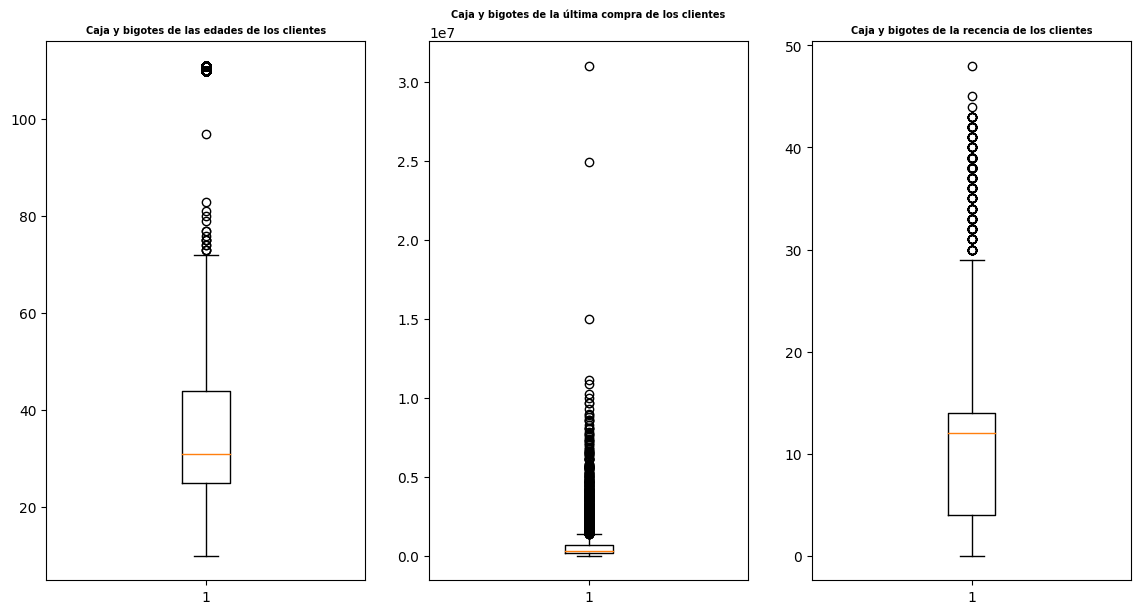

In [6]:
fig = plt.figure(figsize=(14,7))

# Caja y bigotes de la edad 
plt.subplot(1, 3, 1)
box_1 = plt.boxplot(data['Edad'])
plt.title('Caja y bigotes de las edades de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del moto total de la última compra
plt.subplot(1, 3, 2)
plt.boxplot(data['Monto Total de ultima compra'])
plt.title('Caja y bigotes de la última compra de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del tiempo transcurrido en semanas desde la última compra
plt.subplot(1, 3, 3)
plt.boxplot(data['Recencia (Tiempo transcurrido en semanas desde su ultima compra)'])
plt.title('Caja y bigotes de la recencia de los clientes', fontsize=7, fontweight='bold')


In [7]:
data_1 = data[['Edad', 'Monto Total de ultima compra','Recencia (Tiempo transcurrido en semanas desde su ultima compra)']]
data_1.columns = ['edad', 'monto_total', 'recencia']

# Calcular el IQR (rango intercuartil) de la edad
Q1 = data_1['edad'].quantile(0.25)
Q3 = data_1['edad'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['edad'] < limite_inferior) | (data_1['edad'] > limite_superior)]

# Calcular el porcentaje de valores atípicos
porcentaje_atipicos_edad = (len(valores_atipicos) / len(data_1['edad'])) * 100

print(f"Porcentaje de datos atípicos de la edad: {porcentaje_atipicos_edad:.2f}%")

data_1['edad'] = np.clip(data_1['edad'], limite_inferior, limite_superior)



Porcentaje de datos atípicos de la edad: 10.65%


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_18608\2952678955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['edad'] = np.clip(data_1['edad'], limite_inferior, limite_superior)


In [8]:
# Calcular el IQR (rango intercuartil) del monto
Q1 = data_1['monto_total'].quantile(0.25)
Q3 = data_1['monto_total'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['monto_total'] < limite_inferior) | (data_1['monto_total'] > limite_superior)]

# Calcular el porcentaje de valores atípicos
porcentaje_atipicos_monto = (len(valores_atipicos) / len(data_1['monto_total'])) * 100

print(f"Porcentaje de datos atípicos del monto total: {porcentaje_atipicos_monto:.2f}%")

data_1['monto_total'] = np.clip(data_1['monto_total'], limite_inferior, limite_superior)

Porcentaje de datos atípicos del monto total: 8.94%


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_18608\2934625352.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['monto_total'] = np.clip(data_1['monto_total'], limite_inferior, limite_superior)


In [9]:
# Calcular el IQR (rango intercuartil)
Q1 = data_1['recencia'].quantile(0.25)
Q3 = data_1['recencia'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = data_1[(data_1['recencia'] < limite_inferior) | (data_1['recencia'] > limite_superior)]

# Calcular el porcentaje de valores atípicos
porcentaje_atipicos_recencia = (len(valores_atipicos) / len(data_1['recencia'])) * 100

print(f"Porcentaje de datos atípicos de la recencia: {porcentaje_atipicos_recencia:.2f}%")

data_1['recencia'] = np.clip(data_1['recencia'], limite_inferior, limite_superior)

Porcentaje de datos atípicos de la recencia: 2.78%


C:\Users\Jennifer\AppData\Local\Temp\ipykernel_18608\301080449.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['recencia'] = np.clip(data_1['recencia'], limite_inferior, limite_superior)


Text(0.5, 1.0, 'Caja y bigotes de la recencia de los clientes')

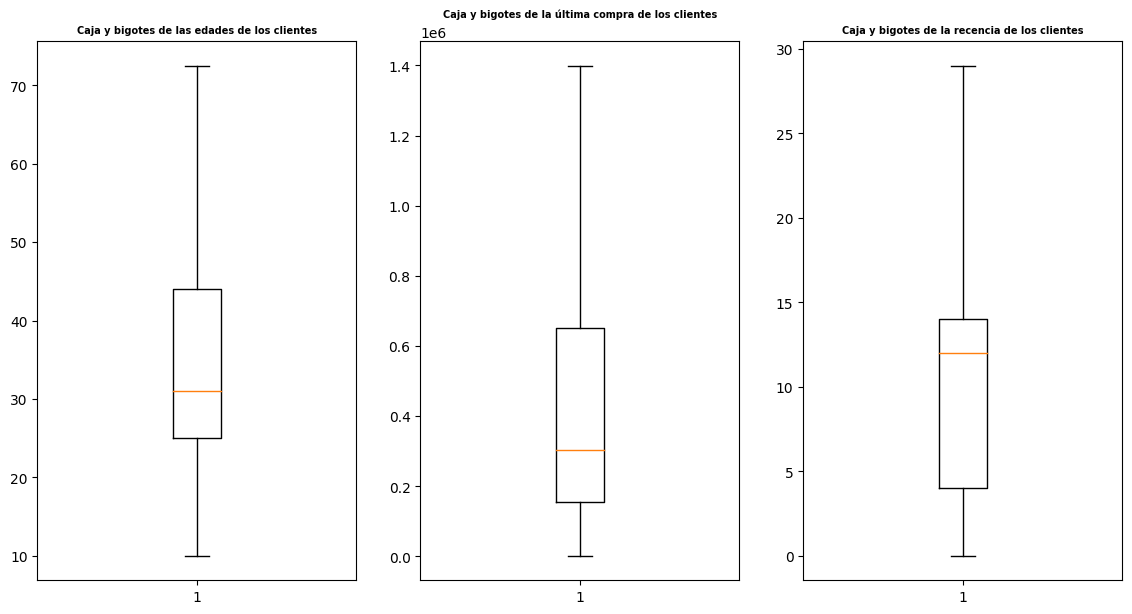

In [10]:
fig = plt.figure(figsize=(14,7))

# Caja y bigotes de la edad 
plt.subplot(1, 3, 1)
box_1 = plt.boxplot(data_1['edad'])
plt.title('Caja y bigotes de las edades de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del moto total de la última compra
plt.subplot(1, 3, 2)
plt.boxplot(data_1['monto_total'])
plt.title('Caja y bigotes de la última compra de los clientes', fontsize=7, fontweight='bold')

# Caja y bigotes del tiempo transcurrido en semanas desde la última compra
plt.subplot(1, 3, 3)
plt.boxplot(data_1['recencia'])
plt.title('Caja y bigotes de la recencia de los clientes', fontsize=7, fontweight='bold')

In [16]:
# Se incluye los datos limpios a la base de datos
data['edad'] = data_1['edad']
data['monto_total'] = data_1['monto_total']
data['recencia'] = data_1['recencia']

# Se eliminas las variables originales (edad, monto total, y recencia)
data.drop(columns=['Edad', 'Monto Total de ultima compra', 'Recencia (Tiempo transcurrido en semanas desde su ultima compra)'], axis=1, inplace=True)

print(data.columns)

Index(['Segmento', 'Compro 2019?', 'Compro 2020?', 'Monto Comprado 2019?',
       'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Es Contactable', 'Ciudad de Residencia',
       'Genero', 'Estado Civil', 'Cantidad Articulos',
       'Frecuencia (Cantidad items comprados)',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta',
       'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales',
       'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena',
       'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza',
       'edad', 'monto_total', 'recencia'],
      dtype='object')


In [19]:
data.columns = ['segmento', 'compra_2019', 'compra_2020', 'monto_2019', 'nro_2019', 'monto_2020', 'nro_2020', 'contactable', 'ciudad', 'genero', 'estado_civil', 'cantidad_articulos', 'frecuencia', 'monto_quilla', 'monto_cucuta', 'monto_bucara', 'monto_manizales', 'monto_pereira', 'monto_cartagena', 'monto_pasto', 'monto_clableplaza', 'edad', 'monto_total', 'recencia']

# Exporto la base de datos
nombre = 'data_clean.xlsx'
data.to_excel(nombre, index=False)

### ***Diferencias entre modelo probabilísticos y determinísticos***

<p> Un modelo determinístico se fundamenta en relaciones precisas y predecibles, en contraste, un modelo probabilístico abarca la presencia de incertidumbre y aleatoriedad. En el caso de un modelo probabilístico, se emplea la inferencia estadística para evaluar eventos fuera de control, mientras que en un modelo determinístico, se llevan a cabo simulaciones. <p>

<p> Para ilustrar esta diferencia, consideremos dos ejemplos. En un modelo determinístico, podríamos calcular la producción total de tomates en un invernadero a lo largo de un año, ya que tenemos un modelo que proporciona datos precisos sobre la cantidad y el tamaño de los frutos que cada planta producirá. Por otro lado, en un modelo probabilístico, podríamos estimar la probabilidad de que una persona desarrolle diabetes en función de variables como su edad, peso, presión arterial, nivel de actividad física, entre otros, reconociendo la naturaleza incierta de estos factores y su influencia en la enfermedad. <p>


<p>Arsham, H. (2022) <em>Probabilistic Modeling Process: Decision Analysis</em>. https://home.ubalt.edu/ntsbarsh/business-stat/opre/SPANISHP.HTM#:~:text=En%20los%20modelos%20determin%C3%ADsticos%2C%20una,riesgo%20que%20cada%20decisi%C3%B3n%20acarrea<p>


